# 1장 파이썬 입문
파이토치를 사용한 딥러닝 프로그래밍에서 중요한 개념을 위주로 설명한다.

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such 

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [ ]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [ ]:
# 파이토치 관련 라이브러리
import torch

In [ ]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

## 1.2 컨테이너 타입 변수에 주의
파이썬에서 변수는 단지 실제 데이터 구조로 향하는 포인터에 지나지 않는다.
넘파이 배열 등에서는 이 점을 의식하지 않으면 생각지도 못한 결과를 초래하는 경우가 있다.

### 넘파이 변수 간

In [ ]:
# 넘파이 배열 x를 정의
x = np.array([5, 7, 9])

# 변수 y에 x를 대입
y = x

# 결과 확인
print(x)
print(y)

[5 7 9]
[5 7 9]


In [ ]:
# x의 특정 요소를 변경
x[1] = -1

# y도 따라서 값이 바뀜
print(x)
print(y)

[ 5 -1  9]
[ 5 -1  9]


In [ ]:
# y도 동시에 변하면 안되는 경우는, 대입 시 copy 함수를 이용함
x = np.array([5, 7, 9])
y = x.copy()

# x의 특정 요소 값이 변해도, y에는 영향이 없음
x[1] = -1
print(x)
print(y)

[ 5 -1  9]
[5 7 9]


### 텐서와 넘파이 변수 간

In [ ]:
import torch

# x1: shape=[5]가 되는 모든 값이 1인 텐서
x1 = torch.ones(5)

# 결과 확인
print(x1)

# x2: x1로부터 생성한 넘파이 배열
x2 = x1.data.numpy()

# 결과 확인
print(x2)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [ ]:
# x1의 값을 변경
x1[1] = -1

# x2의 값도 같이 변함
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[ 1. -1.  1.  1.  1.]


In [ ]:
# 안전한 방법

# x1: 텐서
x1 = torch.ones(5)

# x2: x1를 copy한 넘파이
x2 = x1.data.numpy().copy()

x1[1] = -1

# 결과 확인
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[1. 1. 1. 1. 1.]


## 1.3 ‘합성 함수’를 파이썬으로 구현하기
수학에서 합성함수가 파이썬에서 어떻게 구현되는지 확인한다.

$f(x) = 2x^2 + 2$를 함수로 정의한다.

In [ ]:
def f(x):
    return (2 * x**2 + 2)

In [ ]:
# 넘파이 배열로 x를 정의

x = np.arange(-2, 2.1, 0.25)
print(x)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [ ]:
# f(x)의 결과를 y에 대입

y = f(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


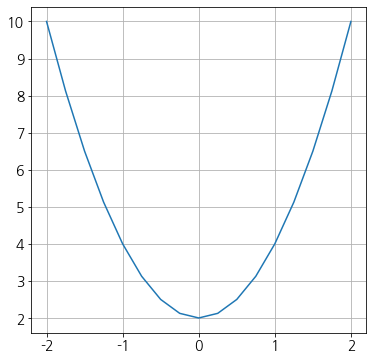

In [ ]:
# 함수를 그래프로 그리기

plt.plot(x, y)
plt.show()

In [ ]:
# 세 가지 기본 함수의 정의

def f1(x):
    return(x**2)

def f2(x):
    return(x*2)

def f3(x):
    return(x+2)

# 합성 함수 만들기

x1 = f1(x)
x2 = f2(x1)
y = f3(x2)

In [ ]:
# 합성 함수 값 확인

print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


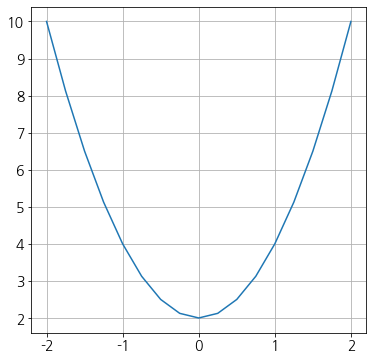

In [ ]:
# 합성 함수 그래프 그리기

plt.plot(x, y)
plt.show()

## 1.4 '미분'과 파이썬의 '수치 미분' 구현하기

파이썬의 함수 또는 변수명은 단지 포인터이며, 실체는 별개로 존재한다. 
이 점을 이용하면, '함수를 인수로하는 함수'를 만들 수 있다.

함수를 수치 미분하는 함수``diff``를 정의한다.
수치 미분의 계산에는, 미분의 정의로부터 다음과 같은 근사식 $f'(x) = \dfrac{f(x+h)-f(x-h)}{2h}$ 를 사용한다.

In [ ]:
# 함수를 미분하는 함수 fdiff 의 정의

def fdiff(f):
    # 함수 f를 인수로 미분한 결과 함수를 diff로 정의
    def diff(x):
        h = 1e-6
        return (f(x+h) - f(x-h)) / (2*h)

    # fdiff 의 반환은 미분한 결과 함수 diff
    return diff

2차 함수 f에 대해, 지금 만든 함수 fdiff를 적용해서 수치 미분 계산을 해본다.

In [ ]:
# 2차 함수의 수치 미분

# f의 미분 결과 함수 diff를 취득
diff = fdiff(f)

# 미분 결과를 계산하고 y_dash에 대입
y_dash = diff(x)

# 결과 확인
print(y_dash)

[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]


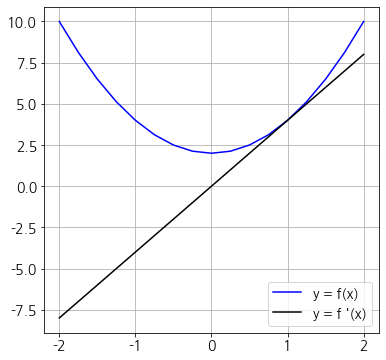

In [ ]:
# 결과 그래프 출력

plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f '(x)", c='k')
plt.legend()
plt.show()

시그모이드 함수 $g(x) = \dfrac{1}{1 + \exp(-x)}$에 대해 같은 계산을 해본다.

In [ ]:
# 시그모이드 함수의 정의

def g(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# 시그모이드 함수 계산

y = g(x)
print(y)

[0.1192 0.148  0.1824 0.2227 0.2689 0.3208 0.3775 0.4378 0.5    0.5622
 0.6225 0.6792 0.7311 0.7773 0.8176 0.852  0.8808]


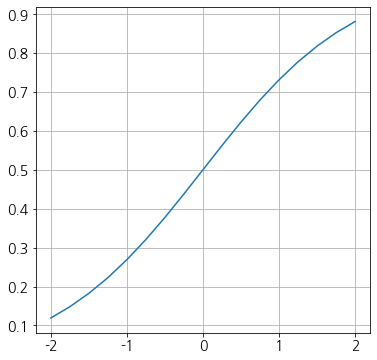

In [ ]:
# 그래프 출력

plt.plot(x, y)
plt.show()

In [ ]:
# 시그모이드 함수의 수치 미분

# g를 미분한 함수 취득
diff = fdiff(g)

# diff를 사용해 미분 결과 y_dash를 계산
y_dash = diff(x)

# 결과 확인
print(y_dash)

[0.105  0.1261 0.1491 0.1731 0.1966 0.2179 0.235  0.2461 0.25   0.2461
 0.235  0.2179 0.1966 0.1731 0.1491 0.1261 0.105 ]


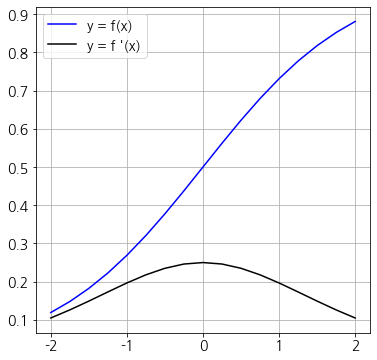

In [ ]:
# 결과 그래프 출력

plt.plot(x, y, label=r'y = f(x)', c='b')
plt.plot(x, y_dash, label=r"y = f '(x)", c='k')
plt.legend()
plt.show()

시그모이드 함수 미분 결과는 $y(1-y)$ 이다.
이것은 y에 대해 2차로, $y=\dfrac{1}{2}$일 때 최대값 $\dfrac{1}{4}$를 취한다.
위의 그래프는 이 결과와 일치하며, 수치 미분이 올바르게 이뤄졌음을 알 수 있다.

## 1.5 커스텀 클래스 정의하기

In [ ]:
# 그래프 출력을 위한 라이브러리
import matplotlib.pyplot as plt

# 원을 그리기 위해 필요한 라이브러리
import matplotlib.patches as patches

In [ ]:
# Point 클래스 정의
class Point:
    # 인스턴스 생성 시에 두 개의 인수 x와 y를 가짐
    def __init__(self, x, y):
        # 인스턴스 속성 x에 첫 번째 인수를 할당
        self.x = x
        # 인스턴스 속성 y에 두 번째 인수를 할당
        self.y = y

    # draw 함수 정의(인수 없음)
    def draw(self):
        # (x, y)에 점을 그림
        plt.plot(self.x, self.y, marker='o', markersize=10, c='k')

In [ ]:
# Point 클래스로 인스턴스 변수 p1과 p2 생성

p1 = Point(2,3)
p2 = Point(-1, -2)

In [ ]:
# p1과 p2의 속성x, y

print(p1.x, p1.y)
print(p2.x, p2.y)

2 3
-1 -2


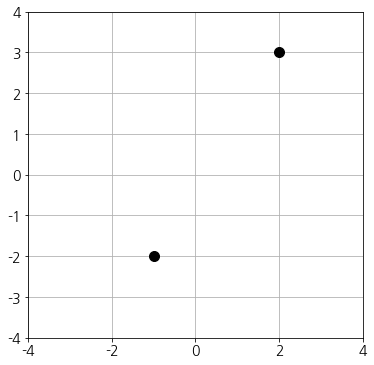

In [ ]:
# p1과 p2의 draw 함수를 호출하고, 두 개의 점을 출력함
p1.draw()
p2.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

In [ ]:
# Point의 자식 클래스 Circle 정의 1

class Circle1(Point):
    # Circle은 인스턴스 생성 시에 인수 x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # 이 단계에서 draw 함수는 정의하지 않음

In [ ]:
# Circle1 클래스에서 인스턴스 변수 c1_1을 생성
c1_1 = Circle1(1, 0, 2)

In [ ]:
# c1_1의 속성 확인
print(c1_1.x, c1_1.y, c1_1.r)

1 0 2


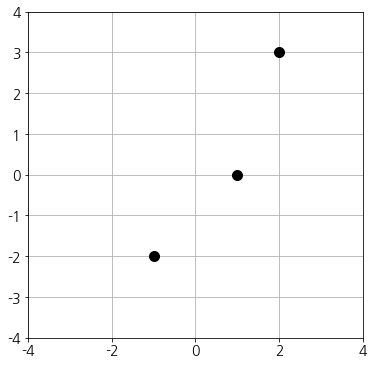

In [ ]:
# p1, p2, c1_1의 각 draw 함수를 호출

ax = plt.subplot()
p1.draw()
p2.draw()
c1_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

이 단계에서 draw 함수는 부모쪽에서 정의한 함수가 호출되고 있음을 알 수 있다.

In [ ]:
# Point의 자식 클래스 Circle의 정의 2

class Circle2(Point):
    # Circle은 인스턴스 생성 시에 인수x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # draw 함수는 자식 클래스만 따로 원을 그림
    def draw(self):
        # 원 그리기
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

In [ ]:
# Circle2 클래스로부터 인스턴스 변수 c2_1을 생성
c2_1 = Circle2(1, 0, 2)

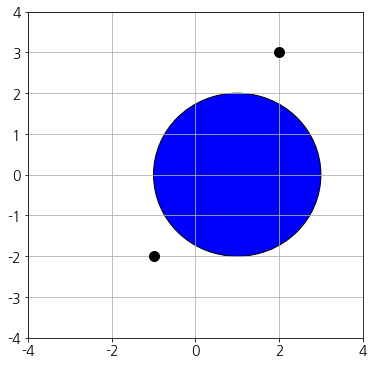

In [ ]:
# p1, p2, c2_1의 각 draw 함수를 호출

ax = plt.subplot()
p1.draw()
p2.draw()
c2_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

부모의 draw 함수 대신 자식의 draw 함수가 호출되었음을 알 수 있다.
그럼, 이 함수와 부모 함수를 모두 호출하고 싶을 때는 어떻게 해야 하는가.

In [ ]:
# Point의 자식 클래스 Circle의 정의 3

class Circle3(Point):
    # Circle은 인스턴스 생성 시에 인수 x, y, r을 가짐
    def __init__(self, x, y, r):
        # x와 y는 부모 클래스의 속성으로 설정
        super().__init__(x, y)
        # r은 Circle의 속성으로 설정
        self.r = r
     
    # Circle의 draw 함수는 부모의 함수를 호출한 다음, 원 그리기를 독자적으로 수행함
    def draw(self):
        # 부모 클래스의 draw 함수 호출
        super().draw()
        
        # 원 그리기
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

In [ ]:
# Circle3 클래스로부터 인스턴스 변수 c3_1를 생성
c3_1 = Circle3(1, 0, 2)

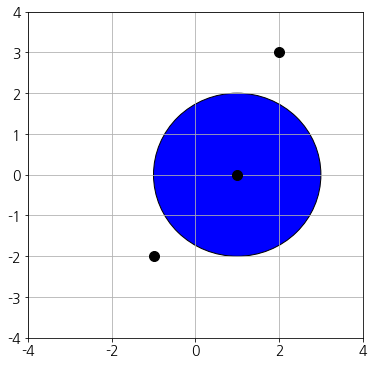

In [ ]:
# p1, p2, c3_1의 각 draw 함수를 호출

ax = plt.subplot()
p1.draw()
p2.draw()
c3_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

## 1.6 인스턴스를 함수로 사용하는 방법

In [ ]:
# 함수 클래스 H의 정의

class H:
    def __call__(self, x):
        return 2*x**2 + 2

In [ ]:
# h가 함수로 동작하는지 확인

# 넘파이 배열 x를 정의
x = np.arange(-2, 2.1, 0.25)
print(x)

# H 클래스의 인스턴스로 h를 생성
h = H() 

# 함수 h 호출
y = h(x)
print(y)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


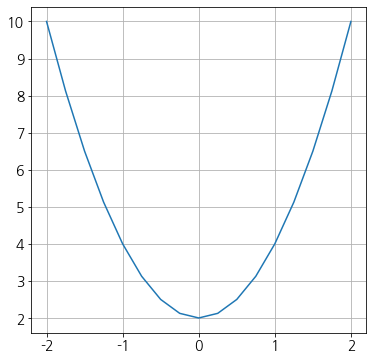

In [ ]:
# 그래프 출력

plt.plot(x, y)
plt.show()